#  Importing the required libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


# Loading the data



In [2]:
breast_cancer = pd.read_csv('breast cancer gene expression.csv')
print(breast_cancer.head())

   samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       84  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1       85  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2       87  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3       90  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4       91  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.880079  4.963740  4.408328  ...             12.229711   
1  7.542283  5.129607  4.584418  ...             12.178531   
2  6.562369  4.813449  4.425195  ...             12.125108   
3  7.802344  5.490982  4.567956  ...             12.111235   
4  7.610457  5.372469  4.424426  ...             12.173642   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             11.852955            13.658701            13.477698   
1             11.809408            13.750086      

In [3]:
breast_cancer.isnull().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

In [4]:
breast_cancer.drop(['type'], axis = 1, inplace = True) 

In [5]:
breast_cancer.shape

(151, 54676)

# Preprocessing the data

In [6]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
breast_cancer_scaled = scaler.fit_transform(breast_cancer)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
breast_cancer_normalized = normalize(breast_cancer_scaled)

# Converting the numpy array into a pandas DataFrame
breast_cancer_normalized = pd.DataFrame(breast_cancer_normalized)


# Reducing the dimensionality of the data to make it visualizable

In [7]:
pca = PCA(n_components = 2)
breast_cancer_principal = pca.fit_transform(breast_cancer_normalized)
breast_cancer_principal = pd.DataFrame(breast_cancer_principal)
breast_cancer_principal.columns = ['P1', 'P2']
print(breast_cancer_principal.head())


         P1        P2
0 -0.548188  0.113944
1 -0.507055 -0.060661
2 -0.452279  0.248089
3 -0.499711 -0.052799
4 -0.561729 -0.094617


# Building the clustering model

In [8]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(breast_cancer_principal)
labels = db_default.labels_


# Visualizing the clustering



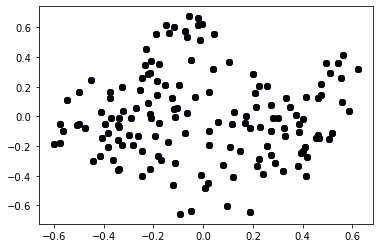

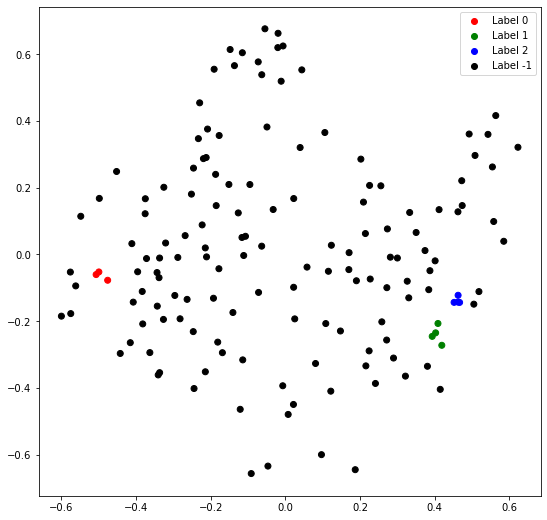

In [9]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(breast_cancer_principal['P1'], breast_cancer_principal['P2'],color ='r');
g = plt.scatter(breast_cancer_principal['P1'], breast_cancer_principal['P2'], color ='g');
b = plt.scatter(breast_cancer_principal['P1'], breast_cancer_principal['P2'], color ='b');
k = plt.scatter(breast_cancer_principal['P1'], breast_cancer_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(breast_cancer_principal['P1'], breast_cancer_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


# Tuning the parameters of the model

In [10]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(breast_cancer_principal)
labels1 = db.labels_


# Visualizing the changes

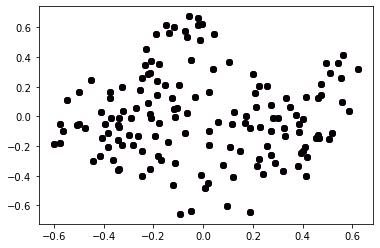

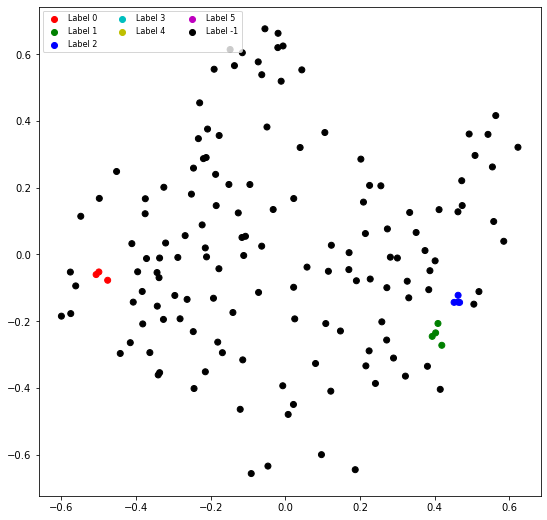

In [11]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
X_principal=breast_cancer_principal
r = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ','Label 4',
			'Label 5', 'Label -1'),
		scatterpoints = 1,
		loc ='upper left',
		ncol = 3,
		fontsize = 8)
plt.show()
